In [ ]:
import os
import pickle
from multiprocessing import Pool
import sys

import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
project_dir = "/content/drive/My Drive/projects/data_monetize"
data_dir = os.path.join(project_dir, "DataMonetize Data")

In [ ]:
clients_info = os.path.join(project_dir, "clients_info")
os.makedirs(clients_info, exist_ok=True)

In [ ]:
os.listdir(data_dir)

['campaigns.csv', 'client_profile.csv', 'products.csv', 'purchases.parquet']

## group clients

In [ ]:
target_columns = [
    "transaction_datetime",
    "client_id",
    "product_id",
    "product_quantity"
]

In [ ]:
purchases_path = os.path.join(data_dir, "purchases.parquet")

### dumping indices

In [ ]:
clients_df = pd.read_parquet(purchases_path, engine='pyarrow',
                               columns=["client_id"])

KeyboardInterrupt: ignored

In [ ]:
clients_df.head()

In [ ]:
len(clients_df)

In [ ]:
client_groups = clients_df.groupby("client_id")

In [ ]:
for client_id, indices in client_groups.groups.items():
    break

In [ ]:
client_id

'000012768de69057f34412477152c78c'

In [ ]:
indices.to_numpy().astype(np.int32)

array([7112351, 7112352, 7112353, 7112354, 7112355, 7112356, 7112357,
       7112358, 7112359, 7112360, 7112361, 7112362, 7112363, 7112364,
       7112365, 7112366, 7112367, 7112368, 7112369, 7112370, 7112371,
       7112372, 7112373, 7112374, 7112375, 7112376, 7112377, 7112378,
       7112379, 7112380, 7112381, 7112382, 7112383, 7112384, 7112385,
       7112386, 7112387, 7112388, 7112389, 7112390, 7112391, 7112392,
       7112393, 7112394, 7112395, 7112396, 7112397, 7112398, 7112399,
       7112400, 7112401, 7112402], dtype=int32)

In [ ]:
dumped_path = os.path.join(clients_info, str(client_id))
np.savez_compressed(dumped_path, indices=indices.to_numpy().astype(np.int32))

In [ ]:
for i, (client_id, indices) in enumerate(client_groups.groups.items()):
    if i > 5000:
        break
    dumped_path = os.path.join(clients_info, str(client_id))
    np.savez_compressed(dumped_path, indices=indices.to_numpy().astype(np.int32))

In [ ]:
del clients_df

### dumping datetime

In [ ]:
datetime_df = pd.read_parquet(purchases_path, engine='pyarrow',
                               columns=["transaction_datetime"])

In [ ]:
datetime_df.head()

,transaction_datetime
0,2018-12-26 11:35:21
1,2018-12-24 15:50:50
2,2018-12-26 11:35:21
3,2018-12-24 15:50:50
4,2018-12-26 11:35:21


In [ ]:
datetime_df.dtypes

transaction_datetime    datetime64[ns]
dtype: object

In [ ]:
for filename in os.listdir(clients_info):
    break

In [ ]:
dumped_path = os.path.join(clients_info, filename)
dumped_data = np.load(dumped_path)

In [ ]:
dumped_data["indices"]

array([7112351, 7112352, 7112353, 7112354, 7112355, 7112356, 7112357,
       7112358, 7112359, 7112360, 7112361, 7112362, 7112363, 7112364,
       7112365, 7112366, 7112367, 7112368, 7112369, 7112370, 7112371,
       7112372, 7112373, 7112374, 7112375, 7112376, 7112377, 7112378,
       7112379, 7112380, 7112381, 7112382, 7112383, 7112384, 7112385,
       7112386, 7112387, 7112388, 7112389, 7112390, 7112391, 7112392,
       7112393, 7112394, 7112395, 7112396, 7112397, 7112398, 7112399,
       7112400, 7112401, 7112402], dtype=int32)

In [ ]:
datetimes = np.array(datetime_df.loc[dumped_data["indices"]]).reshape(-1).astype(np.int64)

In [ ]:
datetimes

array([1544950561000000000, 1552039923000000000, 1544950561000000000,
       1552039923000000000, 1544950561000000000, 1552039923000000000,
       1544950561000000000, 1552039923000000000, 1544950561000000000,
       1552039923000000000, 1544950561000000000, 1552039923000000000,
       1543648365000000000, 1552039923000000000, 1543648365000000000,
       1552039923000000000, 1543648365000000000, 1552039923000000000,
       1543648365000000000, 1552039923000000000, 1543648365000000000,
       1552039923000000000, 1543648365000000000, 1552039923000000000,
       1543648365000000000, 1552039923000000000, 1543648365000000000,
       1552039923000000000, 1544950561000000000, 1552039923000000000,
       1544950561000000000, 1552039923000000000, 1544950561000000000,
       1544950561000000000, 1552575707000000000, 1544950561000000000,
       1552575707000000000, 1543648365000000000, 1552575707000000000,
       1543648365000000000, 1552575707000000000, 1543648365000000000,
       1552575707000

In [ ]:
for filename in os.listdir(clients_info):
    dumped_path = os.path.join(clients_info, filename)
    dumped_data = np.load(dumped_path)

    indices = dumped_data["indices"]
    datetimes = np.array(datetime_df.loc[dumped_data["indices"]]).reshape(-1).astype(np.int64)

    np.savez_compressed(dumped_path, indices=indices, datetimes=datetimes)

In [ ]:
del datetime_df

### dumping product ids

In [ ]:
products_df = pd.read_parquet(purchases_path, engine='pyarrow',
                               columns=["product_id"])

In [ ]:
products_df.head()

,product_id
0,b67a1903d1efc061a0b06f06a4709bcc
1,04309282c2431ec79ade140ebec3e022
2,5cb93c9bc53f53f491f933f35c65a387
3,930bd4833924f58df415d1dc2dc7486c
4,bf07df54e1930007929bd31d8426c8e4


In [ ]:
products_df.dtypes

product_id    object
dtype: object

In [ ]:
for filename in os.listdir(clients_info):
    break

In [ ]:
dumped_path = os.path.join(clients_info, filename)
dumped_data = np.load(dumped_path)

In [ ]:
dumped_data["indices"]

array([7112351, 7112352, 7112353, 7112354, 7112355, 7112356, 7112357,
       7112358, 7112359, 7112360, 7112361, 7112362, 7112363, 7112364,
       7112365, 7112366, 7112367, 7112368, 7112369, 7112370, 7112371,
       7112372, 7112373, 7112374, 7112375, 7112376, 7112377, 7112378,
       7112379, 7112380, 7112381, 7112382, 7112383, 7112384, 7112385,
       7112386, 7112387, 7112388, 7112389, 7112390, 7112391, 7112392,
       7112393, 7112394, 7112395, 7112396, 7112397, 7112398, 7112399,
       7112400, 7112401, 7112402], dtype=int32)

In [ ]:
products = np.array(products_df.loc[dumped_data["indices"]]).reshape(-1)

In [ ]:
products[:5]

array(['4dcf79043ea4774da7cc0392e162f523',
       '36294f82c2ea23e4ce8465b2836b43fc',
       'e6f8ac51746e175573bc97e04895b4c8',
       '785b8ca3d348f32f2705de80681178c3',
       '439498bce2955894329f8ff582c28110'], dtype=object)

In [ ]:
for filename in os.listdir(clients_info):
    dumped_path = os.path.join(clients_info, filename)
    dumped_data = np.load(dumped_path)

    indices = dumped_data["indices"]
    datetimes = dumped_data["datetimes"]
    products = np.array(products_df.loc[indices]).reshape(-1)

    np.savez_compressed(dumped_path, indices=indices, datetimes=datetimes,
                        products=products)

In [ ]:
del products_df

### dumping product amounts

In [ ]:
amounts_df = pd.read_parquet(purchases_path, engine='pyarrow',
                               columns=["product_quantity"])

In [ ]:
amounts_df.head()

,product_quantity
0,1
1,1
2,1
3,1
4,2


In [ ]:
amounts_df.max()

product_quantity    14941.0
dtype: float64

In [ ]:
amounts_df.dtypes

product_quantity    object
dtype: object

In [ ]:
for filename in os.listdir(clients_info):
    break

In [ ]:
dumped_path = os.path.join(clients_info, filename)
dumped_data = np.load(dumped_path)

In [ ]:
dumped_data["indices"]

array([7112351, 7112352, 7112353, 7112354, 7112355, 7112356, 7112357,
       7112358, 7112359, 7112360, 7112361, 7112362, 7112363, 7112364,
       7112365, 7112366, 7112367, 7112368, 7112369, 7112370, 7112371,
       7112372, 7112373, 7112374, 7112375, 7112376, 7112377, 7112378,
       7112379, 7112380, 7112381, 7112382, 7112383, 7112384, 7112385,
       7112386, 7112387, 7112388, 7112389, 7112390, 7112391, 7112392,
       7112393, 7112394, 7112395, 7112396, 7112397, 7112398, 7112399,
       7112400, 7112401, 7112402], dtype=int32)

In [ ]:
amounts = np.array(amounts_df.loc[dumped_data["indices"]]).astype(np.uint16).reshape(-1)

In [ ]:
amounts

array([4, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=uint16)

In [ ]:
for filename in os.listdir(clients_info):
    dumped_path = os.path.join(clients_info, filename)
    dumped_data = np.load(dumped_path, allow_pickle=True)

    indices = dumped_data["indices"]
    datetimes = dumped_data["datetimes"]
    products = dumped_data["products"]
    amounts = np.array(amounts_df.loc[indices]).astype(np.uint16).reshape(-1)

    np.savez_compressed(dumped_path, indices=indices, datetimes=datetimes,
                        products=products, amounts=amounts)

In [ ]:
del amounts_df

## products segments

In [ ]:
products_df = pd.read_csv(os.path.join(data_dir, "products.csv"))

In [ ]:
products_df.head()

,product_id,level_1,level_2,level_3,level_4,segment_id,brand_id,vendor_id,netto,is_own_trademark,is_alcohol
0,1fb580439559efba981fca3aeaa51603,c3d3a8e8c65641a5506c5e0822bc52e2,f93982269d205571c4e94814aec8a29c,852a53f2570d1745ab6ce5cea7cac43c,f3d7acb2aab1b6b3c71eae45369b289f,259.0,67ca3be6f95957f372556d29117fc266,a9eb455ec71c0a2694c5958f6f93c01c,0.30,0,0
1,16ecd66f937aa31fa37f15f87817eedb,c3d3a8e8c65641a5506c5e0822bc52e2,f93982269d205571c4e94814aec8a29c,852a53f2570d1745ab6ce5cea7cac43c,f3d7acb2aab1b6b3c71eae45369b289f,259.0,67ca3be6f95957f372556d29117fc266,a9eb455ec71c0a2694c5958f6f93c01c,0.70,0,0
2,15f35e4ae5bcb0d2dd86ead4087200da,c3d3a8e8c65641a5506c5e0822bc52e2,f93982269d205571c4e94814aec8a29c,852a53f2570d1745ab6ce5cea7cac43c,f3d7acb2aab1b6b3c71eae45369b289f,259.0,67ca3be6f95957f372556d29117fc266,a9eb455ec71c0a2694c5958f6f93c01c,0.36,0,0
3,537c9c7ff2bb439d60cc0a402bb364db,c3d3a8e8c65641a5506c5e0822bc52e2,f93982269d205571c4e94814aec8a29c,852a53f2570d1745ab6ce5cea7cac43c,f3d7acb2aab1b6b3c71eae45369b289f,259.0,4da2dc345f4844de9f3d264689b14a11,a9eb455ec71c0a2694c5958f6f93c01c,0.60,0,0
4,4a6589e97b2a8a9a71929f5ef1d47851,c3d3a8e8c65641a5506c5e0822bc52e2,f93982269d205571c4e94814aec8a29c,852a53f2570d1745ab6ce5cea7cac43c,f3d7acb2aab1b6b3c71eae45369b289f,259.0,c56cfe6e56132a266666af1365ecddc9,7a917b3ae0f69994e7afda12d1dd87e0,0.80,0,0


In [ ]:
len(products_df)

43038

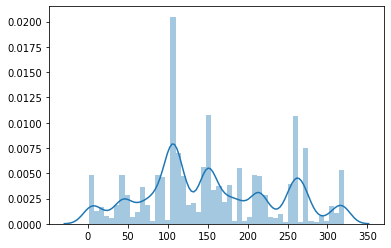

In [ ]:
sns.distplot(np.array(products_df["segment_id"]))

In [ ]:
len(np.unique(np.array(products_df["segment_id"].fillna(1))))

116

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
uniq_labels = np.unique(np.array(products_df["segment_id"].fillna(1)))

In [ ]:
uniq_labels

array([  1.,   3.,   7.,   9.,  13.,  14.,  18.,  21.,  23.,  30.,  31.,
        35.,  37.,  40.,  43.,  45.,  48.,  51.,  57.,  59.,  60.,  61.,
        64.,  69.,  70.,  73.,  75.,  80.,  81.,  85.,  92.,  95.,  96.,
       102., 104., 105., 110., 111., 113., 115., 116., 117., 118., 119.,
       123., 126., 128., 132., 133., 136., 140., 144., 145., 146., 147.,
       148., 149., 150., 151., 157., 161., 163., 165., 171., 172., 174.,
       176., 177., 179., 182., 186., 187., 190., 191., 192., 198., 205.,
       206., 209., 211., 212., 213., 214., 217., 218., 220., 223., 230.,
       232., 235., 240., 241., 249., 251., 255., 256., 258., 259., 260.,
       262., 263., 268., 271., 274., 281., 283., 292., 298., 300., 307.,
       308., 313., 316., 317., 320., 321.])

In [ ]:
encoder = LabelEncoder()
encoder.fit(uniq_labels)

LabelEncoder()

In [ ]:
encoder.transform(uniq_labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115])

In [ ]:
with open(os.path.join(project_dir, "segment_encoder.pickle"), "wb+") as f:
    pickle.dump(encoder, f)

In [ ]:
len(products_df.loc[0])

11

In [ ]:
encoder.transform([3])

array([1])

In [ ]:
product_mapping = dict()
for i in range(len(products_df)):
    row = products_df.loc[i]
    product_id = row[0]
    segment_id = row[5]

    try:
        segment_id = encoder.transform([int(segment_id)])[0]
    except:
        segment_id = -1
    
    product_mapping[product_id] = segment_id

In [ ]:
len(product_mapping)

43038

In [ ]:
list(product_mapping.items())[:10]

[('1fb580439559efba981fca3aeaa51603', 97),
 ('16ecd66f937aa31fa37f15f87817eedb', 97),
 ('15f35e4ae5bcb0d2dd86ead4087200da', 97),
 ('537c9c7ff2bb439d60cc0a402bb364db', 97),
 ('4a6589e97b2a8a9a71929f5ef1d47851', 97),
 ('46e1e0a87bedb2e482a20743cb3def59', 97),
 ('f90c289ac7b0e67d9ee2320e33f1b387', 97),
 ('c08c3766d44e744064db80d9393fddd8', 97),
 ('1d346eced957ee12a81bf79e1406d59f', 97),
 ('b58e63302b9c2e394f8ff58d11240773', 97)]

In [ ]:
with open(os.path.join(project_dir, "product_mapping.pickle"), "wb+") as f:
    pickle.dump(product_mapping, f)

In [ ]:
del products_df

## clients info

In [ ]:
clients_df = pd.read_csv(os.path.join(data_dir, "client_profile.csv"))

In [ ]:
clients_df.head()

,client_id,first_issue_date,first_redeem_date,age,gender
0,0012fbc750ef4ea6df3033a871293631,2018-07-06 19:36:04,2018-07-29 18:52:30,52,F
1,002e7fd44c15546b05c430fcf099af68,2017-07-14 16:27:35,2017-09-01 18:59:59,60,M
2,00508cdd6ac2c10851c9d27cd101f2ef,2017-10-10 12:22:44,2018-03-15 12:06:35,82,M
3,008fb49e3aeae9ee74ca2f233520976e,2017-11-26 11:21:29,2018-05-31 13:07:59,40,U
4,0095340accfbedb931291477bd1f5dcb,2018-02-21 19:08:56,2018-10-14 15:48:53,21,U


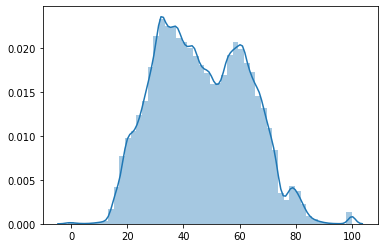

In [ ]:
ages = np.array(clients_df["age"].fillna(-1))
ages[ages < 0] = -1
ages[ages > 100] = 100

mean_age = np.mean(ages)

sns.distplot(ages)

In [ ]:
mean_age

46.495074

In [ ]:
user_mapping = dict()
for i in range(len(clients_df)):
    row = clients_df.loc[i]
    client_id = row[0]
    age = row[3]

    try:
        age = int(age)
    except:
        age = -1
    
    if not 1 <= age <= 100:
        age = mean_age

    user_mapping[client_id] = int(age)

In [ ]:
with open(os.path.join(project_dir, "user_mapping.pickle"), "wb+") as f:
    pickle.dump(user_mapping, f)

In [ ]:
del clients_df

## reading users

In [ ]:
with open(os.path.join(project_dir, "product_mapping.pickle"), "rb") as f:
    product_mapping = pickle.load(f)

with open(os.path.join(project_dir, "user_mapping.pickle"), "rb") as f:
    user_mapping = pickle.load(f)

with open(os.path.join(project_dir, "segment_encoder.pickle"), "rb") as f:
    encoder = pickle.load(f)

In [ ]:
encoder_classes = len(encoder.classes_)
print(encoder_classes)

116


In [ ]:
list(product_mapping.items())[:20]

[('1fb580439559efba981fca3aeaa51603', 97),
 ('16ecd66f937aa31fa37f15f87817eedb', 97),
 ('15f35e4ae5bcb0d2dd86ead4087200da', 97),
 ('537c9c7ff2bb439d60cc0a402bb364db', 97),
 ('4a6589e97b2a8a9a71929f5ef1d47851', 97),
 ('46e1e0a87bedb2e482a20743cb3def59', 97),
 ('f90c289ac7b0e67d9ee2320e33f1b387', 97),
 ('c08c3766d44e744064db80d9393fddd8', 97),
 ('1d346eced957ee12a81bf79e1406d59f', 97),
 ('b58e63302b9c2e394f8ff58d11240773', 97),
 ('47a146163c36204de7383ba6995ee126', 97),
 ('a5641f208bc607e08b14d85a86956596', 97),
 ('be61bee70339e67cab41401a2bdabc42', 97),
 ('e4bbfeb91c56962cd4b718ec937d45c5', 97),
 ('13f897d682a2ac479e6355afd1c56014', 97),
 ('631a44e2d0d0c0bde2cc6f630ad64a2c', 97),
 ('2e9040611c9569ea995214f5ebe607cf', 97),
 ('6e2cfbb7451fd905b424a8706ee8c4e5', 97),
 ('fa48b485f5a072e178d09f909beb7bd6', 97),
 ('1a750402fff4436f16b23d2f68ee8e42', 97)]

In [ ]:
def read_user(user_id):
    global clients_info, product_mapping, user_mapping

    dumped_path = os.path.join(clients_info, user_id + ".npz")
    dumped_data = np.load(dumped_path, allow_pickle=True)

    datetimes = dumped_data["datetimes"]
    products = dumped_data["products"]
    amounts = dumped_data["amounts"]

    age = user_mapping[user_id]
    segments = [product_mapping[product_id] for product_id in products]

    return age, datetimes, segments, amounts

In [ ]:
filenames = os.listdir(clients_info)
user_ids = [filename.replace(".npz", "") for filename in filenames]

In [ ]:
with Pool(16) as pool:
    map_res = pool.map(read_user, user_ids)
users = list(map_res)

In [ ]:
age, datetimes, segments, amounts = users[0]

In [ ]:
mask = np.argsort(amounts)
print(amounts[mask])

[1 1 1 1 1 1 1 1 1]


In [ ]:
def fill_negative_segments(user_info):
    age, datetimes, segments, amounts = user_info
    segments = np.array(segments)
    
    time_groups = np.unique(datetimes)
    for datetime in time_groups:
        mask = datetimes == datetime
        group_segments = segments[mask]
        group_amounts = amounts[mask]

        sorted_indices = np.argsort(group_amounts)
        fill_segment = 0
        for i in sorted_indices[::-1]:
            if group_segments[i] != -1:
                fill_segment = group_segments[i]
        
        group_segments[group_segments == -1] = fill_segment
        segments[mask] = group_segments
    
    return age, datetimes, segments, amounts

In [ ]:
age, datetimes, segments, amounts = fill_negative_segments(users[0])
print(age, segments)

46 [ 34  44 112  44  46   1  58 104  28]


In [ ]:
datetimes

array([1552048426000000000, 1547382515000000000, 1552048426000000000,
       1547382515000000000, 1552048426000000000, 1547382515000000000,
       1547382515000000000, 1547382515000000000, 1547382515000000000])

In [ ]:
with Pool(16) as pool:
    map_res = pool.map(fill_negative_segments, users)

users_filled_segments = list(map_res)

In [ ]:
def plot_user_purchases(user_info, max_size=50):
    age, datetimes, segments, amounts = user_info

    xs = datetimes.copy()
    ys = segments.copy()
    sizes = amounts.copy()
    sizes = sizes / sizes.max() * max_size

    plt.scatter(xs, ys, s=sizes)
    plt.show()

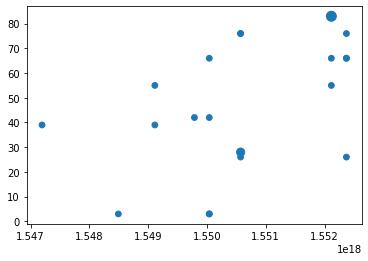

In [ ]:
plot_user_purchases(users_filled_segments[5], 100)

In [ ]:
def user2graph(user_info):
    global encoder_classes

    age, datetimes, segments, amounts = user_info

    nodes = []
    node_times = []
    time_groups = np.unique(datetimes)
    for datetime in time_groups:
        mask = datetimes == datetime
        group_segments = segments[mask]
        group_amounts = amounts[mask]

        current_node = np.zeros(encoder_classes)
        current_node[group_segments] = group_amounts

        nodes.append(current_node)
        node_times.append(datetime)
    
    nodes = np.array(nodes)
    node_times = np.array(node_times)

    sorted_indices = np.argsort(node_times)
    nodes = nodes[sorted_indices]
    node_times = node_times[sorted_indices]

    if len(node_times) <= 1:
        edges = np.array([])
    else:
        edges = node_times[1:] - node_times[:-1]
    
    return nodes, edges

In [ ]:
g = user2graph(users_filled_segments[5])

In [ ]:
g[0].shape

(10, 116)

In [ ]:
with Pool(16) as pool:
    map_res = pool.map(user2graph, users_filled_segments)
graphs = list(map_res)

In [ ]:
del filenames, user_ids

In [ ]:
del users, users_filled_segments, user_mapping, product_mapping

## clusterizing segments

In [ ]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [ ]:
from joblib import dump, load

In [ ]:
concatenated_nodes = np.concatenate([nodes for nodes, edges in graphs])
concatenated_nodes.shape

(99869, 116)

In [ ]:
x = concatenated_nodes.copy()

In [ ]:
def visualize_clustering(y):
    x_emb = np.load(os.path.join(project_dir, "x_embedded.npy"))

    jet = cm = plt.get_cmap("jet") 
    cNorm  = colors.Normalize(vmin=y.min(), vmax=y.max())
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

    color_mapping = dict()
    for color in range(y.min(), y.max()+1):
        color_mapping[color] = scalarMap.to_rgba(color)
    
    y_colors = [color_mapping[y_i] for y_i in y]
    plt.scatter(x_emb[:, 0], x_emb[:, 1], c=y_colors, s=0.1)

### tsne

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
X_embedded = TSNE(n_components=2, n_jobs=-1).fit_transform(x)

KeyboardInterrupt: ignored

In [ ]:
X_embedded.shape

In [ ]:
np.save(os.path.join(project_dir, "x_embedded"), X_embedded)

In [ ]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=0.1)

### umap

In [ ]:
!pip install umap-learn

In [ ]:
import umap

In [ ]:
X_embedded = umap.UMAP(n_components=2).fit_transform(x)

In [ ]:
np.save(os.path.join(project_dir, "x_embedded"), X_embedded)

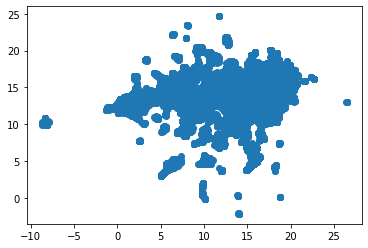

In [ ]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])

### K-NN clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
knn = KMeans(40, tol=1e-2, n_jobs=-1)
knn.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=40, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.01, verbose=0)

In [ ]:
y = knn.predict(x)

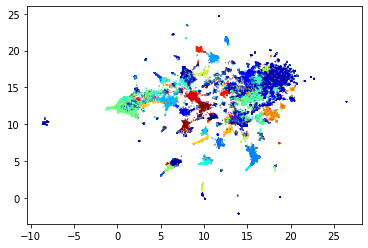

In [ ]:
visualize_clustering(y)

In [ ]:
np.save(os.path.join(project_dir, "y_knn"), y)

In [ ]:
dump(knn, os.path.join(project_dir, "cluster_knn.joblib"))

['/content/drive/My Drive/projects/data_monetize/cluster_knn.joblib']

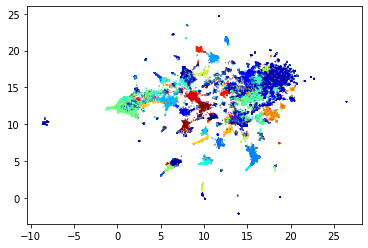

In [ ]:
knn_loaded = load(os.path.join(project_dir, "cluster_knn.joblib"))

y_knn = knn_loaded.predict(x)
visualize_clustering(y_knn)

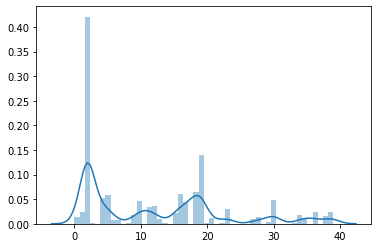

In [ ]:
sns.distplot(y_knn)

In [ ]:
for i in range(40):
    print(i, np.sum(y_knn == i))

0 1099
1 1926
2 32778
3 190
4 4126
5 4505
6 603
7 580
8 163
9 1373
10 3632
11 2733
12 2835
13 725
14 177
15 1772
16 4757
17 3415
18 5060
19 10887
20 119
21 956
22 131
23 2275
24 14
25 17
26 22
27 688
28 1038
29 298
30 3712
31 14
32 1
33 92
34 1320
35 952
36 1895
37 6
38 1187
39 1796


### OPTICS

In [ ]:
from sklearn.cluster import OPTICS

In [ ]:
optics = OPTICS(n_jobs=-1)
y = optics.fit_predict(x)

KeyboardInterrupt: ignored

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(n_jobs=-1)
y = dbscan.fit_predict(x)

In [ ]:
np.save(os.path.join(project_dir, "y_dbscan"), y)

In [ ]:
y

array([-1, -1,  0, ..., -1, -1, -1])

In [ ]:
np.unique(y)

array([  -1,    0,    1, ..., 1145, 1146, 1147])

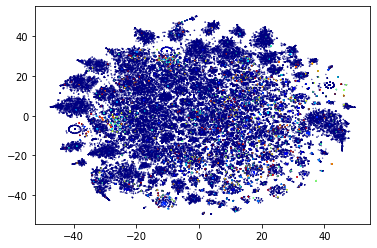

In [ ]:
visualize_clustering(y)

### HDBSCAN

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 11.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2308469 sha256=a9395e6fb0db3eee4ae10da449da97b6079c8df2eb62301230025e82090c861e
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=100)
clusterer.fit(x)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=100, min_samples=None, p=None,
        prediction_data=False)

In [ ]:
clusterer.labels_.shape

(99869,)

In [ ]:
clusterer.labels_.shape

(99869,)

In [ ]:
np.unique(clusterer.labels_).shape

(123,)

In [ ]:
np.savez_compressed(os.path.join(project_dir, "hdbscan_labels"), x=x, y=clusterer.labels_)

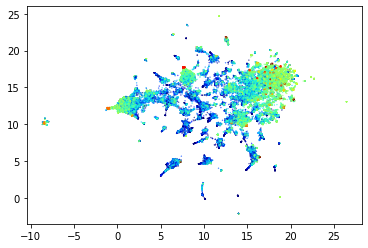

In [ ]:
visualize_clustering(clusterer.labels_)

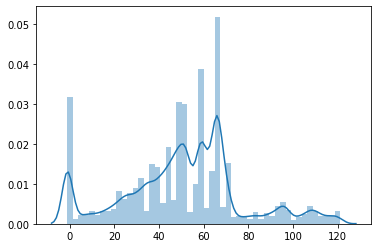

In [ ]:
sns.distplot(clusterer.labels_)

## node prediction

In [ ]:
from joblib import load, dump

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
knn_loaded = load(os.path.join(project_dir, "cluster_knn.joblib"))

In [ ]:
datetime_divizor = 1e9 * 60 * 60 * 24

In [ ]:
# concatenated_edges = np.concatenate([edges for nodes, edges in graphs]) / datetime_divizor

In [ ]:
# concatenated_edges.shape

In [ ]:
# sns.distplot(concatenated_edges[concatenated_edges < 40])

In [ ]:
segment_binarizer = LabelBinarizer()
segment_binarizer.fit(np.unique(knn_loaded.labels_))

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [ ]:
segment_binarizer.transform([1])

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
dump(segment_binarizer, os.path.join(project_dir, "segment_binarizer.joblib"))

['/content/drive/My Drive/projects/data_monetize/segment_binarizer.joblib']

In [ ]:
def nodes2bin(nodes):
    global knn_loaded, segment_binarizer

    cluster_ids = knn_loaded.predict(nodes)
    labels = segment_binarizer.transform(cluster_ids)

    return labels

In [ ]:
def graph2samples(graph):
    nodes, edges = graph

    nodes = nodes2bin(nodes) # convert to binarized cluster ids

    datetime_divizor = 1e9 * 60 * 60 * 24
    edges = edges / datetime_divizor # convert to days

    xs = []
    ys = []

    n = len(nodes)
    for end_node in range(n-1, 0, -1):
        for start_node in range(0, n-1, 1):
            if end_node <= start_node:
                continue
            
            y = nodes[end_node]

            x_nodes = nodes[start_node: end_node]
            x_edges = edges[start_node: end_node]
            x = np.concatenate((x_nodes, x_edges.reshape(-1, 1)), axis=1)

            xs.append(x)
            ys.append(y)
    
    return xs, ys

In [ ]:
xs, ys = graph2samples(graphs[9])

In [ ]:
i = 0

print(xs[i][-1])
print(ys[i])

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         20.13721065]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1]


In [ ]:
xs[0].shape

(4, 41)

In [ ]:
ys[0].shape

(40,)

In [ ]:
len(graphs)

5001

In [ ]:
xs_conc = []
ys_conc = []

for i, graph in enumerate(graphs[:3000]):
    if i % 500 == 0:
        print(i)
    xs, ys = graph2samples(graph)
    xs_conc += xs
    ys_conc += ys

0
500
1000
1500
2000
2500


In [ ]:
del graphs

In [ ]:
del map_res

In [ ]:
ys_conc = np.array(ys_conc)

In [ ]:
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

[('ys_conc', 314073072),
 ('xs_conc', 8769640),
 ('LabelBinarizer', 1184),
 ('xs', 912),
 ('ys', 912),
 ('f', 176),
 ('datetimes', 168),
 ('mask', 168),
 ('segments', 168),
 ('dump', 136),
 ('fill_negative_segments', 136),
 ('graph2samples', 136),
 ('load', 136),
 ('nodes2bin', 136),
 ('plot_user_purchases', 136),
 ('read_user', 136),
 ('user2graph', 136),
 ('amounts', 114),
 ('data_dir', 113),
 ('clients_info', 108),
 ('project_dir', 95),
 ('go', 80),
 ('np', 80),
 ('pd', 80),
 ('plt', 80),
 ('sns', 80),
 ('Pool', 64),
 ('g', 64),
 ('graph', 64),
 ('encoder', 56),
 ('knn_loaded', 56),
 ('pool', 56),
 ('segment_binarizer', 56),
 ('age', 28),
 ('encoder_classes', 28),
 ('i', 28),
 ('datetime_divizor', 24)]

### preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence

Using TensorFlow backend.


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xs_conc, ys_conc, test_size=0.1,
                                                    random_state=42)

In [ ]:
np.savez_compressed(os.path.join(project_dir, "test_data"), x=x_test, y=y_test)

In [ ]:
y_train.shape

(883330, 40)

In [ ]:
x_train[0].shape

(9, 41)

In [ ]:
len(x_test)

98148

In [ ]:
def pad_initial(xs):
    max_size = max([len(x) for x in xs])
    xs_pad = sequence.pad_sequences(xs, maxlen=max_size, padding="pre")

    return xs_pad

In [ ]:
def batch_generator(x, y, batch_size):
    while True:
        for batch_begin in range(0, len(y), batch_size):
            batch_x = x[batch_begin: batch_begin+batch_size]
            batch_x = pad_initial(batch_x)

            batch_y = y[batch_begin: batch_begin+batch_size]

            yield batch_x, batch_y

### models

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

import matplotlib.colors as colors
import matplotlib.cm as cmx

In [ ]:
segment_binarizer = load(os.path.join(project_dir, "segment_binarizer.joblib"))

In [ ]:
class DummyX2y(LogisticRegression):
    def __init__(self, y):
        self.y = y
        self.classes_ = np.sort(np.unique(y))
    
    def predict(self, x, y=None):
        return self.y

#### keras lstm

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, Flatten, BatchNormalization, InputLayer
from keras.layers import Conv2D, MaxPool2D, ConvLSTM2D, Reshape, TimeDistributed

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
from keras.models import load_model

In [ ]:
segment_net = Sequential()
segment_net.add(LSTM(512, return_sequences=True, input_shape=(None, 41)))
segment_net.add(LSTM(512, return_sequences=True))
segment_net.add(LSTM(100))
segment_net.add(Dense(40, activation="softmax"))

segment_net.compile(loss="categorical_crossentropy", optimizer="adadelta", metrics=['accuracy'])

In [ ]:
mcp_save = ModelCheckpoint(os.path.join(project_dir, "segment_net.{epoch:02d}_epoch.{val_accuracy:.2f}_val_acc.hdf5"),
                           monitor='val_loss', mode='min')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=7, verbose=1, mode='min')

callbacks = [mcp_save, reduce_lr_loss]

In [ ]:
batch_size = 512

In [ ]:
for x_batch, y_batch in batch_generator(x_test, y_test, batch_size):
    break

In [ ]:
x_batch.shape

(512, 111, 41)

In [ ]:
i = 12

print(x_batch[i][-1])
print(y_batch[i])

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 4]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [ ]:
segment_net.fit_generator(batch_generator(x_train, y_train, batch_size),
    steps_per_epoch=len(x_train) // batch_size,
    validation_data=batch_generator(x_test, y_test, batch_size),
    validation_steps=len(x_test) // batch_size,
    epochs=100, callbacks=callbacks)

Epoch 1/100
1725/1725 [==============================] - 1365s 792ms/step - loss: 2.3630 - accuracy: 0.3737 - val_loss: 2.2362 - val_accuracy: 0.3840
Epoch 2/100
1725/1725 [==============================] - 1355s 785ms/step - loss: 2.1967 - accuracy: 0.3895 - val_loss: 2.1885 - val_accuracy: 0.3924
Epoch 3/100
1725/1725 [==============================] - 1356s 786ms/step - loss: 2.1044 - accuracy: 0.3999 - val_loss: 2.0585 - val_accuracy: 0.4043
Epoch 4/100
1725/1725 [==============================] - 1354s 785ms/step - loss: 1.9966 - accuracy: 0.4156 - val_loss: 1.8890 - val_accuracy: 0.4214
Epoch 5/100
1725/1725 [==============================] - 1352s 784ms/step - loss: 1.8594 - accuracy: 0.4451 - val_loss: 1.8326 - val_accuracy: 0.4599
Epoch 6/100
1725/1725 [==============================] - 1353s 785ms/step - loss: 1.6858 - accuracy: 0.4974 - val_loss: 1.7295 - val_accuracy: 0.5192
Epoch 7/100
1725/1725 [==============================] - 1355s 786ms/step - loss: 1.4868 - accuracy:

In [ ]:
segment_net_rec = load_model(os.path.join(project_dir,
                                          "segment_net.15_epoch.0.80_val_acc.hdf5"))

In [ ]:
segment_net_rec.save_weights(os.path.join(project_dir, "segment_net.weights"))

In [ ]:
segment_net_rec.evaluate_generator(batch_generator(x_test, y_test, batch_size),
                               len(x_test) // batch_size)

[0.6953933238983154, 0.7960671782493591]

In [ ]:
y_true = []
y_pred = []

for i, (x_batch, y_batch) in enumerate(batch_generator(x_test, y_test, batch_size)):
    if i >= len(x_test) // batch_size:
        break
    
    y_batch_pred = segment_net_rec.predict_classes(x_batch).reshape(-1)
    y_batch = segment_binarizer.inverse_transform(y_batch).reshape(-1)

    y_true.append(y_batch)
    y_pred.append(y_batch_pred)

y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76       979
           1       0.84      0.69      0.76      1836
           2       0.74      0.93      0.83     34269
           3       0.94      0.55      0.69       109
           4       0.89      0.73      0.80      3862
           5       0.85      0.69      0.76      4053
           6       0.91      0.62      0.74       503
           7       0.83      0.69      0.76       502
           8       0.88      0.50      0.63       101
           9       0.84      0.66      0.74      1111
          10       0.81      0.81      0.81      3867
          11       0.85      0.65      0.74      2225
          12       0.78      0.79      0.79      2888
          13       0.90      0.73      0.80       764
          14       0.87      0.65      0.74       147
          15       0.88      0.72      0.79      1941
          16       0.83      0.76      0.80      4941
          17       0.86    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



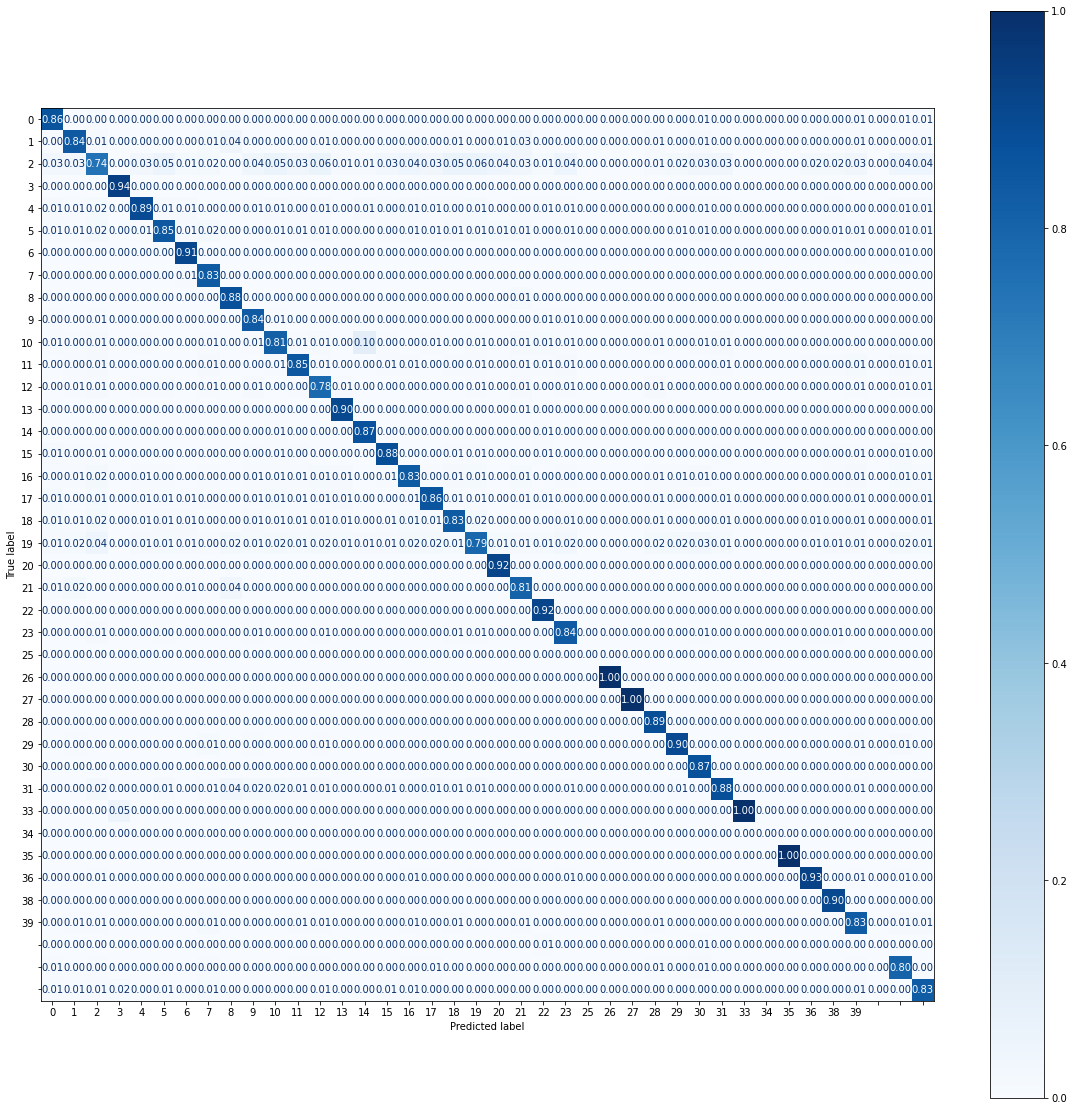

In [ ]:
dummy_x2y = DummyX2y(y_pred)

fig, ax = plt.subplots(1, figsize=(20, 20))

plot_confusion_matrix(dummy_x2y, np.zeros((len(y_test), 1)), y_true,
                      display_labels=dummy_x2y.classes_, values_format=".2f",
                      cmap=plt.cm.Blues, normalize="pred", ax=ax)

In [ ]:
y_batch_pred

NameError: ignored

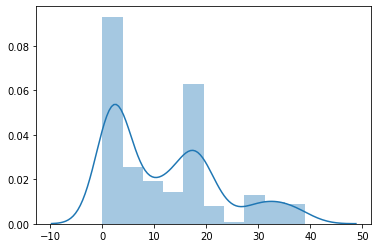

In [ ]:
sns.distplot(np.argmax(y_batch, axis=1))

In [ ]:
!pipreqsnb --help

usage: pipreqsnb [-h] [--use-local] [--debug] [--print] [--force] [--no-pin]
                 [--pypi-server PYPI_SERVER] [--proxy PROXY] [--ignore IGNORE]
                 [--encoding ENCODING] [--savepath SAVEPATH] [--diff DIFF]
                 [--clean CLEAN]
                 [path]

positional arguments:
  path

optional arguments:
  -h, --help            show this help message and exit
  --use-local
  --debug
  --print
  --force
  --no-pin
  --pypi-server PYPI_SERVER
  --proxy PROXY
  --ignore IGNORE
  --encoding ENCODING
  --savepath SAVEPATH
  --diff DIFF
  --clean CLEAN


In [ ]:
!pipreqsnb "/content/drive/My Drive/Colab Notebooks/data_monetize.ipynb" --savepath reqs.txt

pipreqs  --savepath reqs.txt .//__temp_pipreqsnb_folder/
INFO: Successfully saved requirements file in reqs.txt


In [ ]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [ ]:
tf.__version__

'2.2.0'

In [ ]:
keras.__version__

'2.3.1'